In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('C:/Users/khaled/Desktop/Education/GUC Documents/Semester 10/Machine Learning/Project/ML.csv')

In [3]:
df.head()

,vendor,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,store_and_fwd_flag_M,trip_type_Street-hail,trip_type_Unknown,rate_type_Standard rate,rate_type_Unknown,rate_type_Negotiated fare,payment_type_Credit card,payment_type_Cash,payment_type_Unknown,weekend
0,1,1.0,1,1.0,0.50,-0.000978,0.00,0.0,0.3,1,...,False,True,False,1,0,0,0,1,0,0.0
1,0,1.0,0,1.0,3.25,-0.000978,0.00,0.0,0.3,1,...,False,True,False,1,0,0,0,1,0,0.0
2,0,2.0,2,1.0,0.50,-0.000978,0.00,0.0,0.3,1,...,False,True,False,1,0,0,0,1,0,0.0
3,0,1.0,0,1.0,0.50,-0.000978,0.00,0.0,0.3,1,...,False,True,False,1,0,0,0,0,1,0.0
4,1,1.0,0,1.0,0.50,-0.000978,2.26,0.0,0.3,1,...,False,True,False,1,0,0,1,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476392 entries, 0 to 476391
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vendor                     476392 non-null  int64  
 1   passenger_count            476392 non-null  float64
 2   trip_distance              476392 non-null  int64  
 3   fare_amount                476392 non-null  float64
 4   extra                      476392 non-null  float64
 5   mta_tax                    476392 non-null  float64
 6   tip_amount                 476392 non-null  float64
 7   tolls_amount               476392 non-null  float64
 8   improvement_surcharge      476392 non-null  float64
 9   total_amount               476392 non-null  int64  
 10  payment_type               476392 non-null  object 
 11  congestion_surcharge       476392 non-null  float64
 12  hour                       476392 non-null  int64  
 13  day_of_week                47

In [5]:
df.describe()

,vendor,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,hour,day_of_week,week_number,rate_type_Standard rate,rate_type_Unknown,rate_type_Negotiated fare,payment_type_Credit card,payment_type_Cash,payment_type_Unknown,weekend
count,476392.000000,476392.000000,476392.000000,476392.000000,476392.000000,4.763920e+05,476392.000000,476392.000000,476392.000000,476392.000000,...,476392.000000,476392.000000,476392.000000,476392.000000,476392.000000,476392.000000,476392.000000,476392.000000,476392.000000,476392.000000
mean,0.864746,0.715694,0.452375,1.081305,0.793125,-9.784671e-04,0.827972,0.004441,0.241694,1.100724,...,13.765279,2.895888,2.617647,0.790169,0.187629,0.019232,0.437940,0.346389,0.210306,0.239563
std,0.341995,0.903937,0.780300,0.291038,1.024616,1.301044e-18,1.403726,0.019664,0.118711,0.328872,...,5.591795,1.867223,1.268440,0.407189,0.390416,0.137340,0.496134,0.475819,0.407526,0.426817
min,0.000000,-1.000000,0.000000,0.000000,-1.000000,-9.784671e-04,-3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,-9.784671e-04,0.000000,0.000000,0.300000,1.000000,...,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.500000,-9.784671e-04,0.000000,0.000000,0.300000,1.000000,...,14.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,-9.784671e-04,1.500000,0.000000,0.300000,1.000000,...,18.000000,4.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,4.000000,3.000000,2.000000,3.750000,-9.784671e-04,6.920000,0.091510,0.300000,2.000000,...,23.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the Data into 80% Training, 10% Test and 10% CV

In [6]:
X = df.drop(columns=['total_amount', 'payment_type', 'date_range'])
y = df['total_amount']

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp,random_state=42)

# KNN Classifier

In [8]:
knn = make_pipeline(SMOTE(random_state=42), KNeighborsClassifier(n_neighbors=5)) 

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("KNN Validation Accuracy:", val_accuracy)

# Predict on the test set
y_test_pred = knn.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("KNN Test Accuracy:", test_accuracy)


KNN Validation Accuracy: 0.9369424211255484
KNN Test Accuracy: 0.9363979848866498


**Cross Validation**

In [9]:
pipeline = make_pipeline(SMOTE(random_state=42), KNeighborsClassifier(n_neighbors=5))
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=7), X, y, cv=skf)
cv_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')
print("KNN Cross Validation accuracy:", cv_scores)

KNN Cross Validation accuracy: [0.93704804 0.93728943 0.9369949  0.93654359 0.93677449]


**Confusion Matrix**

In [10]:
cm = confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix:")
print(cm)
print("")
print("Classifications Report:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix:
[[  219   194     6]
 [   93 40265  1646]
 [   11  1080  4126]]

Classifications Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59       419
           1       0.97      0.96      0.96     42004
           2       0.71      0.79      0.75      5217

    accuracy                           0.94     47640
   macro avg       0.79      0.76      0.77     47640
weighted avg       0.94      0.94      0.94     47640



**Class 0: This class has lower precision (0.68) and recall (0.52), indicating the model struggles to correctly identify and recall instances of this class. This is reflected in the confusion matrix, where only 219 out of 419 instances are correctly classified, with a significant number misclassified as Class 1 (194).**

**Class 1: This class has high precision (0.97) and recall (0.96), showing the model is highly effective at identifying and recalling instances of this class. The confusion matrix supports this with 40265 out of 42004 instances correctly classified.**

**Class 2: This class has moderate precision (0.71) and recall (0.79). The confusion matrix shows 4126 out of 5217 instances are correctly classified, with some misclassification into Class 1 (1080 instances).**

**Overall, the model is performing well.**

**ROC Curves**

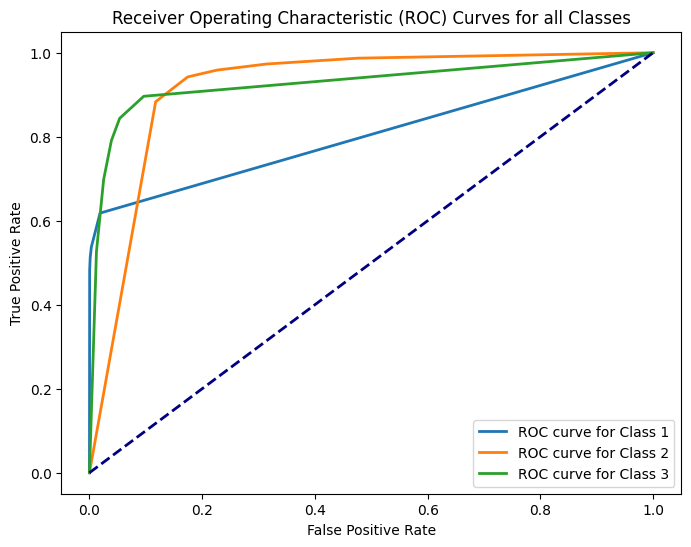

In [11]:
plt.figure(figsize=(8, 6))

for class_label in {0,1,2}:
    
    y_test_pred_proba = knn.predict_proba(X_test)[:, class_label]

    # Calculate ROC curve for class 1
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba, pos_label=class_label)

    # Plot ROC curve for the current class with a different color
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for Class {class_label+1}')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for all Classes')
plt.legend(loc='lower right')
plt.show()

**This graph also shows the Receiver Operating Characteristic (ROC) curves for a multi-class classification problem, with three classes, generated using logistic regression.**

**The ROC curves plot the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings for each class. The closer the curve is to the top-left corner, the better the classifier's performance.**

**1. Class 1 (Blue Curve)*: This curve stays very close to the top-left corner, indicating a high TPR and a low FPR. The classifier is highly effective at distinguishing Class 1 from the other classes.**

**2. Class 2 (Orange Curve)*: This curve is also near the top-left corner but appears slightly lower than the blue curve at certain points. The classifier performs well for Class 2, though possibly not as well as for Class 1.**

**3. Class 3 (Green Curve)*: This curve is close to the top-left corner but shows a slightly lower performance compared to Classes 1 and 2, especially in the initial part of the curve. However, it still demonstrates good performance, as it is significantly above the diagonal line.**


**All three ROC curves are well above the diagonal line, which represents a random classifier's performance. This indicates that the logistic regression model performs significantly better than random guessing for all three classes. The high True Positive Rates combined with low False Positive Rates across the classes reflect an effective classification model. The model is particularly strong in distinguishing Class 1, with Classes 2 and 3 also showing robust performance.**

# Logistic Regression 

**Data Preparation**

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X = scaler.transform(X)

**Logistic Regression Classifier**

In [25]:
# Initiate the model
lgr = LogisticRegression()

# Train the model
lgr.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = lgr.predict(X_val)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Logistic Regression Validation Accuracy:", val_accuracy)

# Predict on the test s
y_test_pred = lgr.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Logistic Regression Accuracy:", test_accuracy)


Logistic Regression Validation Accuracy: 0.9480677596087239
Logistic Regression Accuracy: 0.9498320738874895


**Cross Validation**

In [21]:
lgr = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(lgr, X, y, cv=skf, scoring='accuracy')
print("Logistic Regression Cross Validation accuracy:", cv_scores)

Logistic Regression Cross Validation accuracy: [0.94985254 0.94946421 0.94876047 0.94893889 0.94922228]


**Confusion Matrix**

In [22]:
cm = confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix:")
print(cm)
print("")
print("Classifications Report:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix:
[[  236   183     0]
 [    2 41282   720]
 [    0  1485  3732]]

Classifications Report:
              precision    recall  f1-score   support

           0       0.99      0.56      0.72       419
           1       0.96      0.98      0.97     42004
           2       0.84      0.72      0.77      5217

    accuracy                           0.95     47640
   macro avg       0.93      0.75      0.82     47640
weighted avg       0.95      0.95      0.95     47640



**Class 0: This class has very high precision (0.99) but lower recall (0.56), indicating that while the model is very good at correctly identifying instances of Class 0, it misses a significant number of actual instances (236 correctly classified out of 419). Many instances are misclassified as Class 1 (183).**

**Class 1: This class has high precision (0.96) and very high recall (0.98), indicating that the model is both very good at correctly identifying instances of Class 1 and at recalling almost all actual instances. The confusion matrix shows that 41282 out of 42004 instances are correctly classified, with very few misclassified as Class 0 (2) or Class 2 (720).**

**Class 2: This class has good precision (0.84) and moderate recall (0.72). The model correctly classifies 3732 out of 5217 instances, but a notable number are misclassified as Class 1 (1485).**

**Overall, the model achieves a high accuracy of 0.95, indicating strong performance across the dataset.**

**ROC Curves**

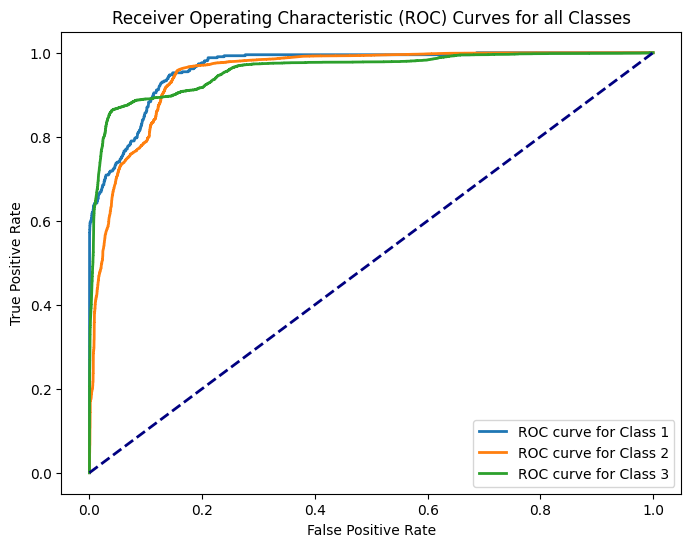

In [26]:
plt.figure(figsize=(8, 6))

for class_label in {0,1,2}:
    
    y_test_pred_proba = lgr.predict_proba(X_test)[:, class_label]

    # Calculate ROC curve for class 1
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba, pos_label=class_label)

    # Plot ROC curve for the current class with a different color
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for Class {class_label+1}')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for all Classes')
plt.legend(loc='lower right')
plt.show()

**The ROC curves in the graph indicate that the classifier has good performance for all three classes:**

**1. Class 1 (Blue Curve)*: This curve stays close to the top-left corner, suggesting a high True Positive Rate (TPR) and a low False Positive Rate (FPR). This implies that the classifier is highly effective at distinguishing Class 1 from the other classes.**

**2. Class 2 (Orange Curve)*: This curve also stays near the top-left corner, though it appears slightly lower than the blue curve at some points. This indicates that the classifier performs well for Class 2, though potentially not as well as for Class 1.**

**3. Class 3 (Green Curve)*: Similarly, this curve is close to the top-left corner, showing good performance. It suggests that the classifier is effective at distinguishing Class 3 from the others.**

**Overall, since all ROC curves are significantly above the diagonal line (which represents random guessing), the classifier demonstrates strong performance across all classes. High True Positive Rates combined with low False Positive Rates across the classes reflect an effective classification model.**